In [ ]:
! pip install bqplot
! pip install pingouin
! pip install chart_studio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=17de12681aebd7fe2f6b96bebc653df4eab8e640dac016ee44ead91e3907a91e
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py

# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

#Montar la unidad en drive
from google.colab import drive
import os

drive.mount('/content/gdrive')

# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/CoderHouse/Datasets/glassdoordata.csv')

df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


* Medidas: Age, Income, Bonus
* Dimensiones: jobtitle, gender, performance, education, department, seniority

In [ ]:
print( "Estructura de datos:", df.shape)
df.info() #info sobre datos nulos

Estructura de datos: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   jobtitle     1000 non-null   object
 1   gender       1000 non-null   object
 2   age          1000 non-null   int64 
 3   performance  1000 non-null   int64 
 4   education    1000 non-null   object
 5   department   1000 non-null   object
 6   seniority    1000 non-null   int64 
 7   income       1000 non-null   int64 
 8   bonus        1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df['pay'] = df['income'] + df['bonus']

df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [ ]:
# Calcular promedio por genero
promedio_por_genero = df.groupby('gender')['pay'].mean()

print(promedio_por_genero)

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64


* Variable dependiente: pay      pay = income + bonus
* Variable independiente: gender


# Gráficos Descriptivos

## Para investigar cuales son las variables independientes

### Boxplot pay vs gender


Text(0.5, 1.0, 'Pay vs Gender')

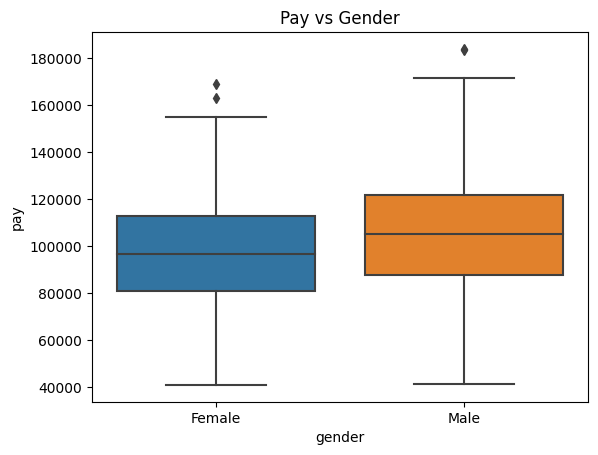

In [ ]:
sns.boxplot(x = "gender", y = "pay", data = df)
plt.title("Pay vs Gender")

### Gráfico de dispersión

Text(0, 0.5, 'Pay')

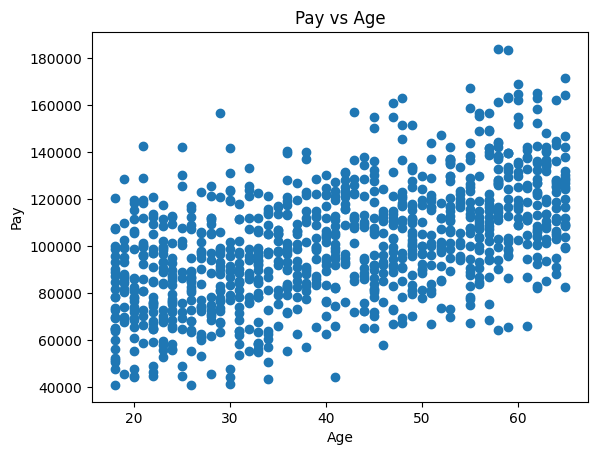

In [ ]:
plt.scatter(df['age'], df['pay'])
plt.title('Pay vs Age')
plt.xlabel('Age')
plt.ylabel('Pay')

### Gráfico de dispersión con linea de tendencia

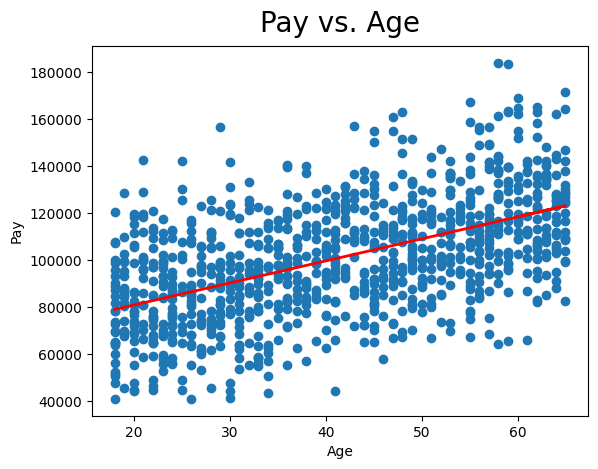

In [ ]:
ages = df['age']
pays = df['pay']

# Ajustar una regresión lineal a los datos
coefficients = np.polyfit(ages, pays, 1)
b, a = coefficients  # b1 es la pendiente, b0 es la intersección en el eje y

# Crear una línea de tendencia basada en los coeficientes encontrados
trend_line = b * ages + a

# Crear el gráfico de dispersión y la línea de tendencia
plt.scatter(ages, pays)
plt.plot(ages, trend_line, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

### Boxplot multivariado

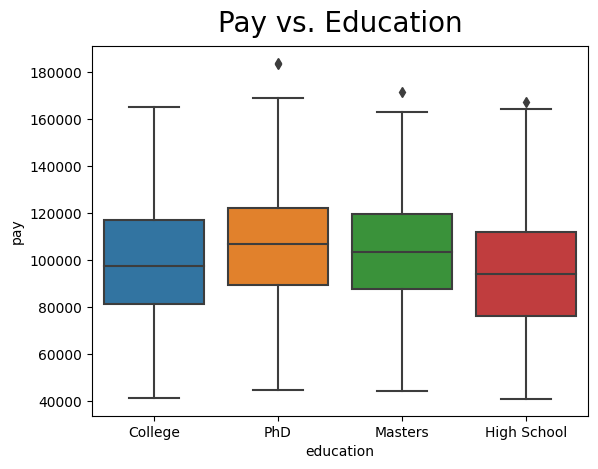

In [ ]:
sns.boxplot(x='education', y = 'pay', data = df)
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

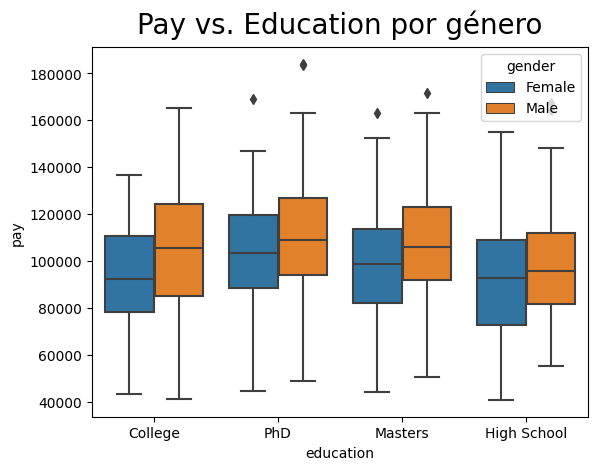

In [ ]:
sns.boxplot(x='education', y = 'pay', hue = "gender", data = df)
plt.title("Pay vs. Education por género", fontsize=20, verticalalignment='bottom');

### Diferencia salarial



In [ ]:
#Filtramos por género la compensación totañ
salarios_femeninos = df[df['gender'] == 'Female']['pay']
salarios_masculinos = df[df['gender'] == 'Male']['pay']

# Calcular la media de los salarios para cada género
media_femenino = salarios_femeninos.mean()
media_masculino = salarios_masculinos.mean()

#Diferencias entre medias poblacionales

diferencia_salarial = media_masculino - media_femenino

print(diferencia_salarial)

8501.847374847363


# Regresión con MCO


In [ ]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.04e-74
Time:                        14:19:33   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

# Para pruebas F y t

### H0: No existe diferencia en las medias poblacionales de salario por edad

Como se rechaza H0 en la prueba F llegamos a la conclusión que la edad si tiene diferencias en las medias poblacionales con respecto a la paga. Por lo que si se puede utilizar como variable independiente


In [ ]:
model2 = 'pay~age + gender'
lm1   = sm.ols(formula = model2, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           8.10e-84
Time:                        14:41:34   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

In [ ]:
model4 = 'pay~jobtitle + age+ performance + education+department + seniority + gender'
lm4    = sm.ols(formula = model4, data = df).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:49:30   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 